# Root fit analyzing neural network


By Brady Lowe

lowebra2@isu.edu

7/25/2018


This Jupyter notebook was written to both develope and explain how we can use
neural networks to analyze the output of root fits to raw data.

#### Load necessary packages

In [2]:
# Load some packages

# Keras packages for network
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, Conv2D, Flatten
from keras.models import Model
from keras.optimizers import Adam, SGD
# For saving model
from keras.models import model_from_json

# Some items for plotting and drawing
from keras.utils import plot_model
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG
from PIL import Image
from scipy import misc
import matplotlib.pyplot as plt

# Need numpy
import numpy as np
import nn_utils

%matplotlib inline

Using TensorFlow backend.


#### Load root fit data from file

In [3]:
# Load dataset with m examples
m = -1
train_images, train_labels, test_images, test_labels = nn_utils.load_dataset(m)

# Grab number of images
m_train = train_images.shape[0]
m_test = test_images.shape[0]

# Grab dimensions of picture
h = train_images.shape[1]
w = train_images.shape[2]
c = train_images.shape[3]

# Print dimensions
print("(m_train, height, width, channels): (" + str(m_train) + ", " + str(h) + ", " + str(w) + ", " + str(c) + ")")
print("m_test: " + str(m_test))


(m_train, height, width, channels): (679, 236, 348, 3)
m_test: 85


label: good
label: [1]


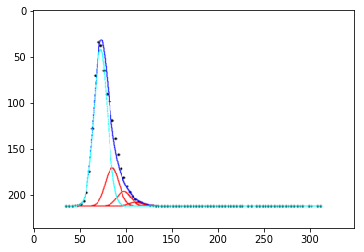

In [9]:
# Print an image
index = 420
this_image = train_images[index]
if train_labels[index] == 1:
    print("label: good")
else:
    print("label: bad")
print("label: " + str(train_labels[index]))
plt.imshow(np.uint8(nn_utils.get_printable_image(this_image)))

## Define and Train Simple neural network (LRU)

Here, we will use simple layers of relu neurons that are all fully connected (some number of these layers from 0 to 5), and then we will have a single neuron output layer acting as a logistic regression unit (LRU). 
For this fully connected network, we will flatten our data into a single dimension.

#### Properly shape data for LRU

In [4]:
# Reshape the data for the network we will use (logistic regression)
train_images_flat = train_images.reshape(m_train, -1)
test_images_flat = test_images.reshape(m_test, -1)

# Grab input dimensionality
n_x = train_images_flat.shape[1]
# Print sizes
print("n_x: " + str(n_x))
print("shape train_images_flat: " + str(train_images_flat.shape[0]) + ", " + str(train_images_flat.shape[1]))
print("shape test_images_flat: " + str(test_images_flat.shape[0]) + ", " + str(test_images_flat.shape[1]))

n_x: 246384
shape train_images_flat: 679, 246384
shape test_images_flat: 85, 246384


#### Define keras layers (model)
Just one neuron fully connected to all pixels in the input image.

In [12]:
# Define input layer (flat)
X = Input(shape=(n_x,))
# Define output activation (sigmoid neuron)
a = Dense(units=1, activation='sigmoid')(X)
# Make the model
simple_model = Model(inputs=X, outputs=a)
# Print summary
simple_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 246384)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 246385    
Total params: 246,385
Trainable params: 246,385
Non-trainable params: 0
_________________________________________________________________


#### Define keras ADDITIONAL layers (deeper model)
This is a slightly larger fully-connected model.
This model has 40 neurons in the first layer (fully
connected to input layer), 30 neurons in the second 
layer, 20 neurons in the third layer, and a single
neuron in the output layer. We implement dropout between
some of the layers to help reduce overfitting.

In [56]:
# Define input layer (flat)
X = Input(shape=(n_x,))
# First layer
a = Dense(units=40, activation='relu')(X)
# Add dropout for regularization
a = Dropout(rate=0.6)(a)
# Second layer
a = Dense(units=30, activation='relu')(a)
# Add dropout for regularization
a = Dropout(rate=0.5)(a)
# Third layer
a = Dense(units=20, activation='relu')(a)
# Define output activation (sigmoid neuron)
a = Dense(units=1, activation='sigmoid')(a)
# Make the model
simple_model = Model(inputs=X, outputs=a)
# Print summary
simple_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 246384)            0         
_________________________________________________________________
dense_9 (Dense)              (None, 40)                9855400   
_________________________________________________________________
dropout_5 (Dropout)          (None, 40)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 30)                1230      
_________________________________________________________________
dropout_6 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 20)                620       
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 21        
Total para

##### Define optimizer, loss, and metrics. Compile model.

In [57]:
# Define optimizer
opt = Adam(lr=0.01, beta_1=0.9, beta_2=0.999, decay=0.001)
# Define loss
loss = 'binary_crossentropy'
# Define metrics to use
metrics=[]
metrics.append('accuracy')
# Compile model
simple_model.compile(loss=loss, optimizer='adam', metrics=metrics)

##### Fit the model to the data (train)

In [61]:
# Now, fit the model to the data
simple_model.fit(train_images_flat, train_labels, epochs=100, batch_size=128)

Epoch 1/100
679/679 [==============================] - 2s 2ms/step - loss: 0.1772 - acc: 0.9352
Epoch 2/100
679/679 [==============================] - 2s 2ms/step - loss: 0.1837 - acc: 0.9337
Epoch 3/100
679/679 [==============================] - 2s 2ms/step - loss: 0.2074 - acc: 0.9161
Epoch 4/100
679/679 [==============================] - 2s 2ms/step - loss: 0.2339 - acc: 0.9013
Epoch 5/100
679/679 [==============================] - 2s 2ms/step - loss: 0.2126 - acc: 0.9087
Epoch 6/100
679/679 [==============================] - 2s 2ms/step - loss: 0.1946 - acc: 0.9264
Epoch 7/100
679/679 [==============================] - 2s 2ms/step - loss: 0.2014 - acc: 0.9205
Epoch 8/100
679/679 [==============================] - 2s 2ms/step - loss: 0.1905 - acc: 0.9264
Epoch 9/100
679/679 [==============================] - 2s 2ms/step - loss: 0.2131 - acc: 0.9131
Epoch 10/100
679/679 [==============================] - 2s 2ms/step - loss: 0.1939 - acc: 0.9219
Epoch 11/100
679/679 [=================

##### Load pretrained weights from disc

In [ ]:
# load json and create model
json_file = open('simple_model.json', 'r')
simple_model_json = json_file.read()
json_file.close()
simple_model = model_from_json(simple_model_json)
# load weights into new model
simple_model.load_weights("simple_model.h5")
print("Loaded model from disk")

##### Evaluate the model on the dev set

In [62]:
# Evaluate model, get metrics back
stats = simple_model.evaluate(x=test_images_flat, y=test_labels)
# Calculate predictions vector from model
predictions = simple_model.predict(x=test_images_flat)
predictions = np.floor(predictions + 0.5)

# Get vector mask for good and bad fits and right and wrong answers
good_fits = test_labels
bad_fits = 1 - good_fits
wrong_answers = np.abs(np.subtract(predictions, test_labels))
right_answers = np.subtract(1, wrong_answers)
# Calculate true positives (tp), as well as (tn) (fp) (fn)
true_positives = np.multiply(right_answers, good_fits)
true_negatives = np.multiply(right_answers, bad_fits)
false_positives = np.multiply(wrong_answers, good_fits)
false_negatives = np.multiply(wrong_answers, bad_fits)
# Calculate additional metrics
precision = np.sum(true_positives) / np.sum(true_positives + false_positives)
recall = np.sum(true_positives) / np.sum(true_positives + false_negatives)

# Print stats
print()
print("Performance on DEV set")
print("..........................")
print("Loss: " + str(stats[0]))
print("Accuracy: " + str(stats[1]))
print("Precision: " + str(precision))
print("Recall: " + str(recall))

# Print list of indices of wrong answers
bad_list = []
for i in range(m_test):
    if wrong_answers[i] == 1:
        bad_list.append(i)
print("..........................")
print("List of indices of wrong guesses:")
print(bad_list)

85/85 [==============================] - 0s 2ms/step

Performance on DEV set
..........................
Loss: 1.22582657197
Accuracy: 0.752941180678
Precision: 0.717948717949
Recall: 0.736842105263
..........................
List of indices of wrong guesses:
[7, 9, 14, 17, 27, 28, 30, 31, 34, 36, 40, 48, 53, 55, 60, 71, 72, 76, 77, 82, 84]


##### Look at an image

label: [1]
prediction: [ 0.]


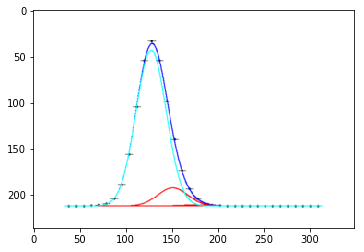

In [28]:
# Choose an index 
index = 7
# Print labels for this index
print("label: " + str(good_fits[index]))
print("prediction: " + str(predictions[index]))

# Show image
this_image = test_images[index]
plt.imshow(np.uint8(nn_utils.get_printable_image(this_image)))

##### Save model to disk

In [60]:
# serialize model to JSON
model_json = simple_model.to_json()
with open("simple_model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
simple_model.save_weights("simple_model.h5")
print("Saved model to disk")

Saved model to disk
